In [1]:
import sys
sys.path.insert(0, "../..")

In [2]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split

from logistic_regression import LogisticRegressionGD
from extrapolation import *
from experiments import Experiment, RestartingExperiment

In [3]:
device = "cpu"

X = []
with open("../../../madelon_train.data") as f:
    for line in f:
        X.append([float(x) for x in line.split()])
X = np.array(X)
X /= X.max()
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
X = torch.tensor(X, device=device)
with open("../../../madelon_train.labels") as f:
    y = [int(x) for x in f]
y = torch.tensor(y, device=device)
X.shape, y.shape

(torch.Size([2000, 501]), torch.Size([2000]))

In [4]:
np.random.seed(2020)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## $\tau = 10^2$

In [5]:
model = LogisticRegressionGD(X_train, y_train, 1e2, device=device)

In [6]:
model.fit(1e-12, max_iter=100500)

In [7]:
len(model.log)

5048

In [8]:
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.5600, dtype=torch.float64)

### Without restarting

In [9]:
experiment = Experiment(model.log, model.obj, values=model.value_log)

In [10]:
experiment.run_method("VLT", h_algorithm, 5, method_kwargs={"k": 4, "type": "t"})

In [11]:
experiment.run_method("VLU", h_algorithm, 5, method_kwargs={"k": 4, "type": "u"})

In [12]:
experiment.run_method("VLV", h_algorithm, 6, method_kwargs={"k": 4, "type": "v"})

In [13]:
experiment.run_method("SLT", e_algorithm, 5, method_kwargs={"k": 4, "type": "t"})

In [14]:
experiment.run_method("SLU", e_algorithm, 5, method_kwargs={"k": 4, "type": "u"})

In [15]:
experiment.run_method("SLV", e_algorithm, 6, method_kwargs={"k": 4, "type": "v"})

In [16]:
experiment.run_method("RRE+QR", RRE, 4, method_kwargs={"qr": True})

In [17]:
experiment.run_method("MMPE", MMPE, 4)

In [18]:
experiment.run_method("Epsilon inv", vector_epsilon_v1, 8, method_kwargs={"k": 4})

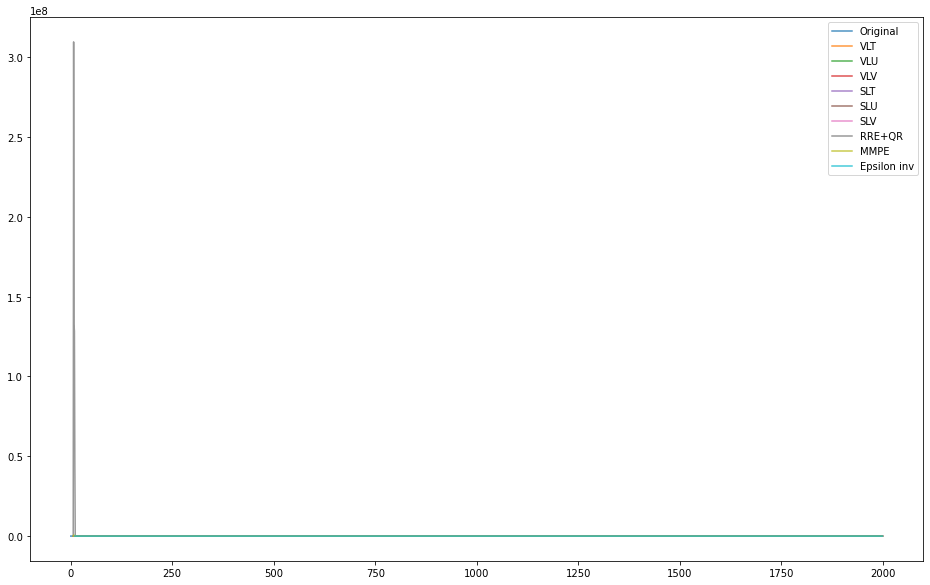

In [19]:
experiment.plot_values(n=2000, figsize=(16, 10))

../../experiments.py:64: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(np.array(self.value_logs[m][:len(x[k + 2::stride])]) - best)),
../../experiments.py:64: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(np.array(self.value_logs[m][:len(x[k + 2::stride])]) - best)),


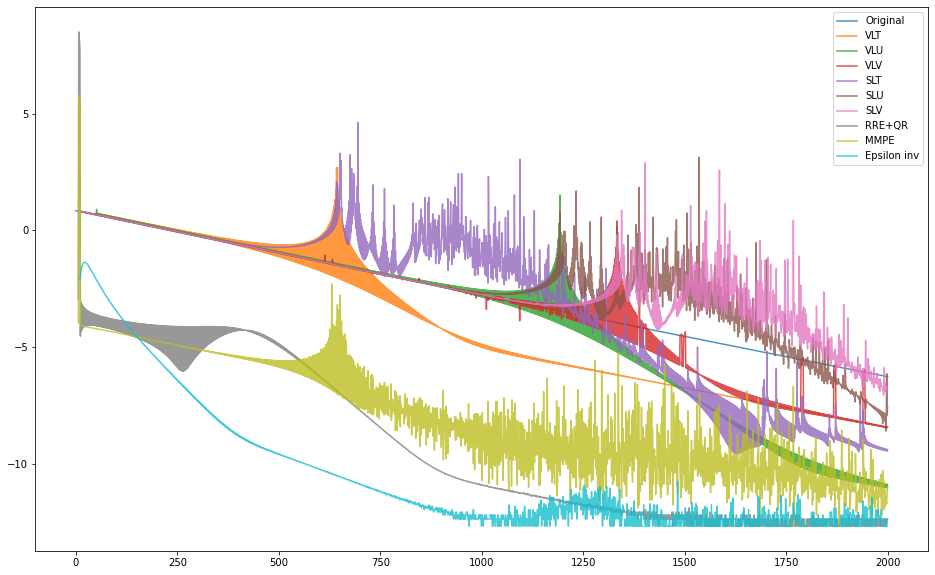

In [20]:
experiment.plot_log_diff(n=2000, figsize=(16, 10))

In [21]:
model.theta = experiment.best_x
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.5600, dtype=torch.float64)

### With restarting

In [22]:
experiment = RestartingExperiment(model)

In [23]:
experiment.run_method("VLT", h_algorithm, 5, 2000, method_kwargs={"k": 4, "type": "t"})

In [24]:
experiment.run_method("VLU", h_algorithm, 5, 2000, method_kwargs={"k": 4, "type": "u"})

In [25]:
experiment.run_method("VLV", h_algorithm, 6, 2000, method_kwargs={"k": 4, "type": "v"})

In [26]:
experiment.run_method("SLT", e_algorithm, 5, 2000, method_kwargs={"k": 4, "type": "t"})

In [27]:
experiment.run_method("SLU", e_algorithm, 5, 2000, method_kwargs={"k": 4, "type": "u"})

In [28]:
experiment.run_method("SLV", e_algorithm, 6, 2000, method_kwargs={"k": 4, "type": "v"})

In [29]:
experiment.run_method("RRE+QR", RRE, 4, 2000, method_kwargs={"qr": True})

In [30]:
experiment.run_method("Epsilon inv", vector_epsilon_v1, 8, 2000, method_kwargs={"k": 4})

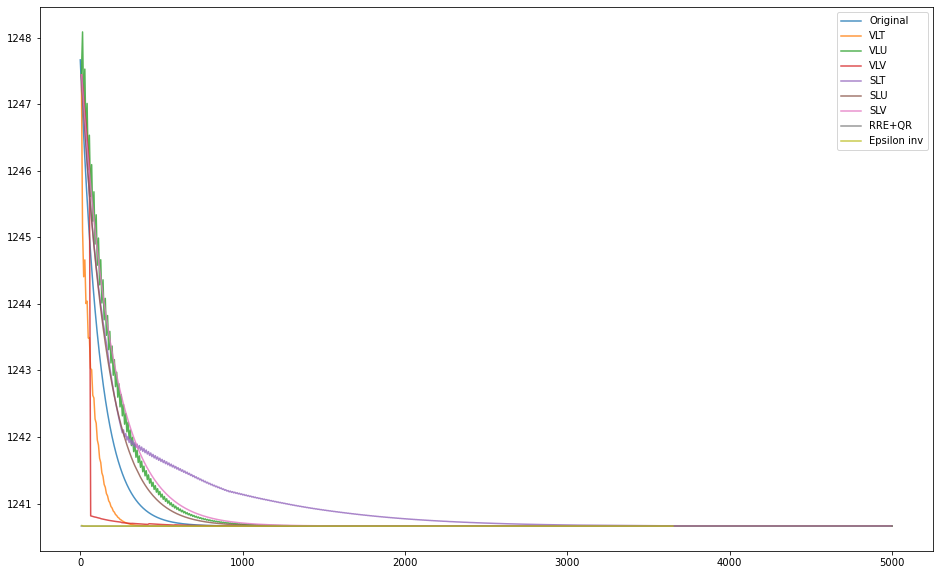

In [31]:
experiment.plot_values(n=5000, figsize=(16, 10))

../../experiments.py:59: RuntimeWarning: divide by zero encountered in log10
  ax.plot(x, np.log10(np.abs(np.array(self.values[:n]) - best)), label="Original", alpha=0.8)
../../experiments.py:64: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(np.array(self.value_logs[m][:len(x[k + 2::stride])]) - best)),
../../experiments.py:64: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(np.array(self.value_logs[m][:len(x[k + 2::stride])]) - best)),
../../experiments.py:64: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.abs(np.array(self.value_logs[m][:len(x[k + 2::stride])]) - best)),


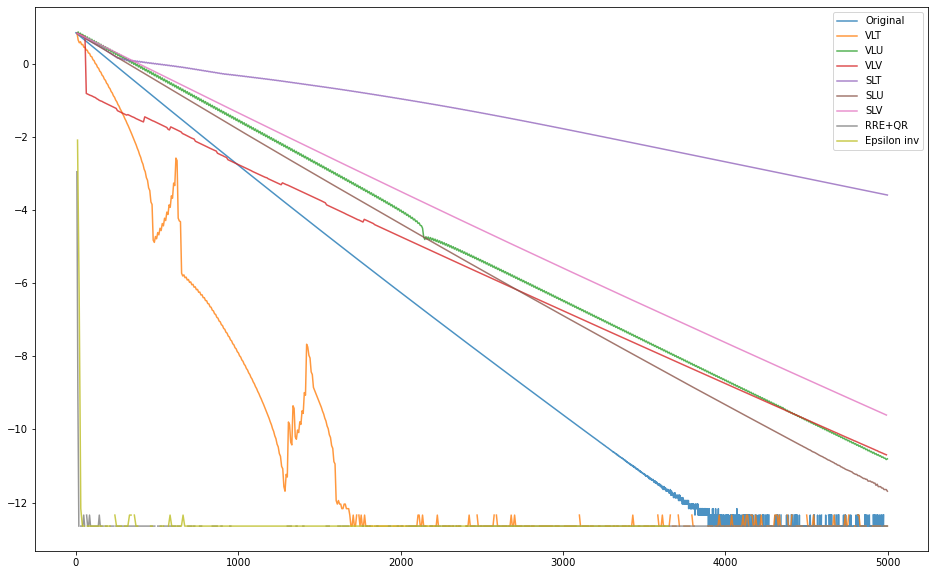

In [32]:
experiment.plot_log_diff(n=5000, figsize=(16, 10))

In [33]:
model.theta = experiment.best_x
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.5600, dtype=torch.float64)

## $\tau = 10^{-3}$

In [5]:
model = LogisticRegressionGD(X_train, y_train, 1e-3, device=device)

In [6]:
model.fit(1e-8, max_iter=100500)

In [7]:
len(model.log)

100501

In [8]:
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.5600, dtype=torch.float64)

### Without restarting

In [38]:
experiment = Experiment(model.log, model.obj, values=model.value_log)

In [39]:
experiment.run_method("VLT", h_algorithm, 5, method_kwargs={"k": 4, "type": "t"})

In [40]:
experiment.run_method("VLU", h_algorithm, 5, method_kwargs={"k": 4, "type": "u"})

In [41]:
experiment.run_method("VLV", h_algorithm, 6, method_kwargs={"k": 4, "type": "v"})

In [42]:
experiment.run_method("SLT", e_algorithm, 5, method_kwargs={"k": 4, "type": "t"})

In [43]:
experiment.run_method("SLU", e_algorithm, 5, method_kwargs={"k": 4, "type": "u"})

In [44]:
experiment.run_method("SLV", e_algorithm, 6, method_kwargs={"k": 4, "type": "v"})

In [45]:
experiment.run_method("RRE+QR", RRE, 4, method_kwargs={"qr": True})

In [46]:
experiment.run_method("MMPE", MMPE, 4)

In [47]:
experiment.run_method("Epsilon inv", vector_epsilon_v1, 8, method_kwargs={"k": 4})

In [48]:
experiment.save("madelon-levin-1e-3.p")

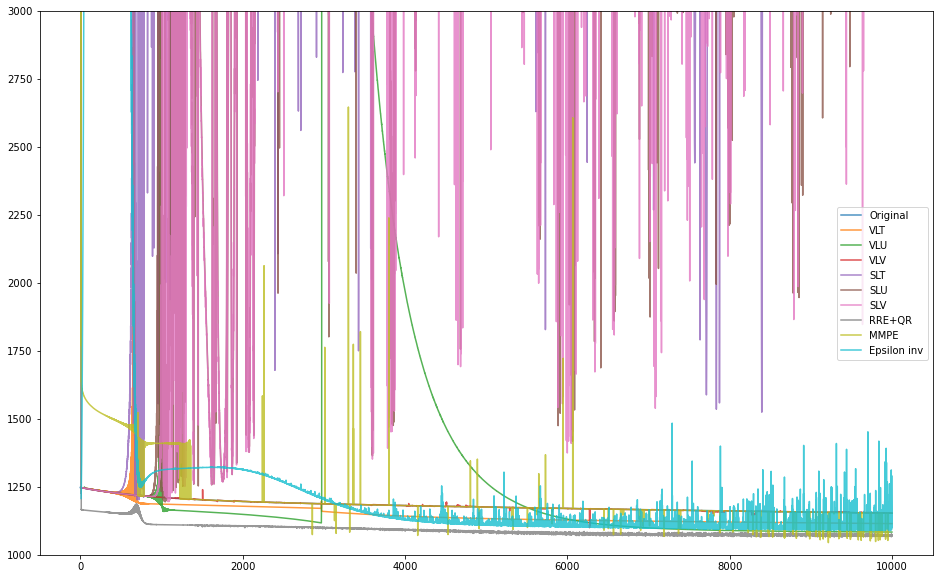

In [57]:
experiment.plot_values(n=10000, figsize=(16, 10), ylim=(1000, 3000))

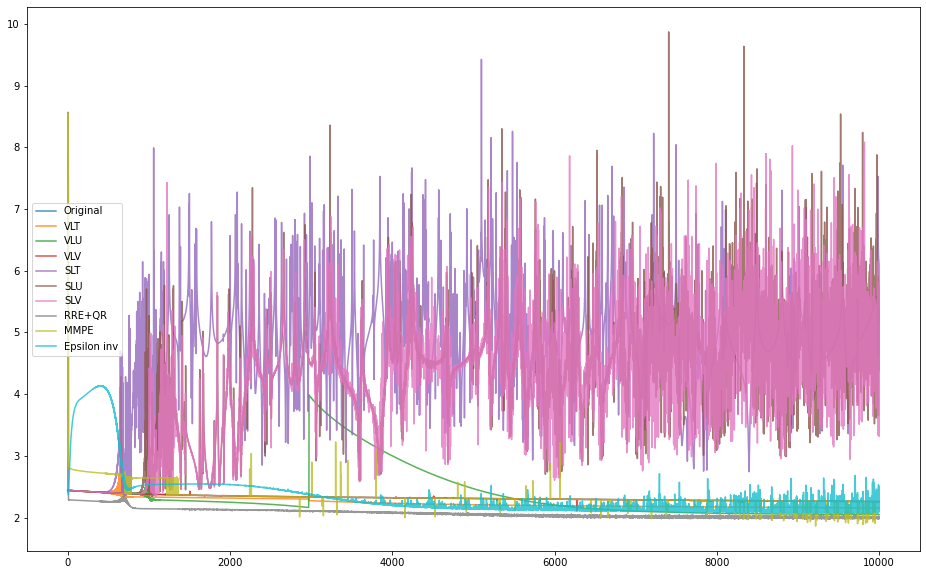

In [50]:
experiment.plot_log_diff(n=10000, figsize=(16, 10))

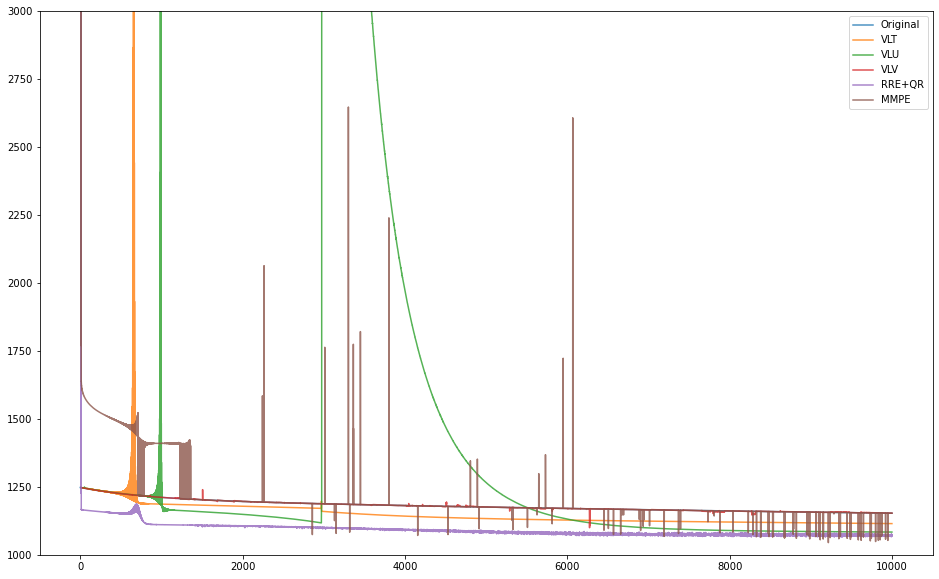

In [59]:
experiment.plot_values(n=10000, figsize=(16, 10), ylim=(1000, 3000),
                      methods=["VLT", "VLU", "VLV", "RRE+QR", "MMPE"])

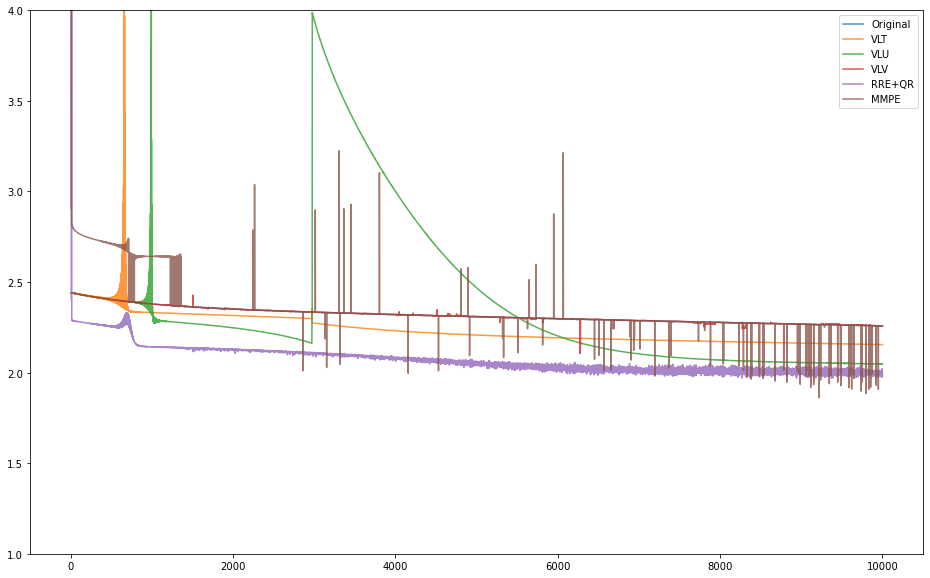

In [63]:
experiment.plot_log_diff(n=10000, figsize=(16, 10), 
                         methods=["VLT", "VLU", "VLV", "RRE+QR", "MMPE"], ylim=(1, 4))

### With restarting

In [9]:
experiment = RestartingExperiment(model)

In [10]:
experiment.run_method("VLT", h_algorithm, 5, 10000, method_kwargs={"k": 4, "type": "t"})

In [11]:
experiment.run_method("VLU", h_algorithm, 5, 10000, method_kwargs={"k": 4, "type": "u"})

In [12]:
experiment.run_method("VLV", h_algorithm, 6, 5000, method_kwargs={"k": 4, "type": "v"})

In [13]:
experiment.run_method("SLT", e_algorithm, 5, 5000, method_kwargs={"k": 4, "type": "t"})

In [14]:
experiment.run_method("SLU", e_algorithm, 5, 5000, method_kwargs={"k": 4, "type": "u"})

In [15]:
experiment.run_method("SLV", e_algorithm, 6, 5000, method_kwargs={"k": 4, "type": "v"})

In [16]:
experiment.run_method("RRE+QR", RRE, 4, 5000, method_kwargs={"qr": True})

In [17]:
experiment.run_method("MMPE", MMPE, 4, 5000)

In [18]:
experiment.run_method("Epsilon inv", vector_epsilon_v1, 8, 5000, method_kwargs={"k": 4})

In [19]:
experiment.save("madelon-levin-restarts-1e-3")

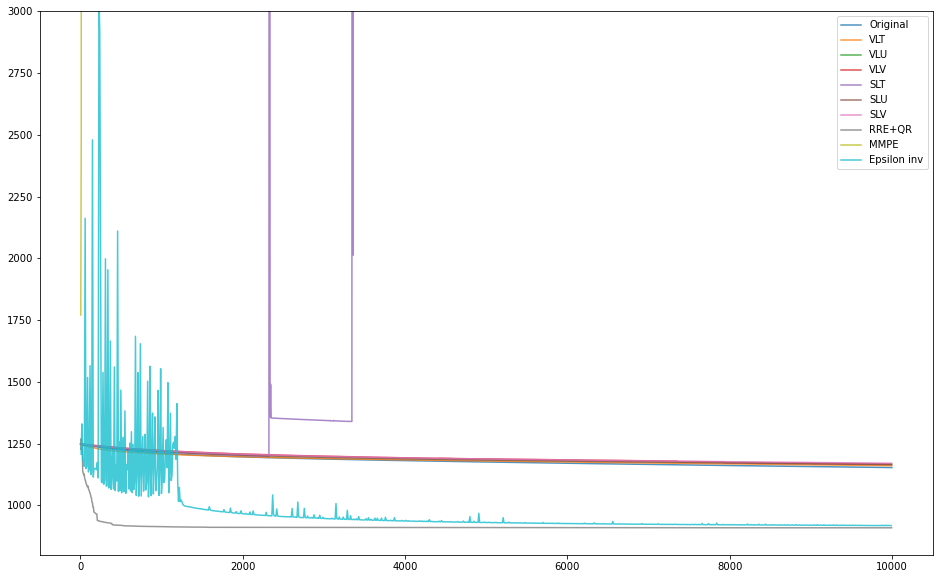

In [23]:
experiment.plot_values(n=10000, figsize=(16, 10), ylim=(800, 3000))

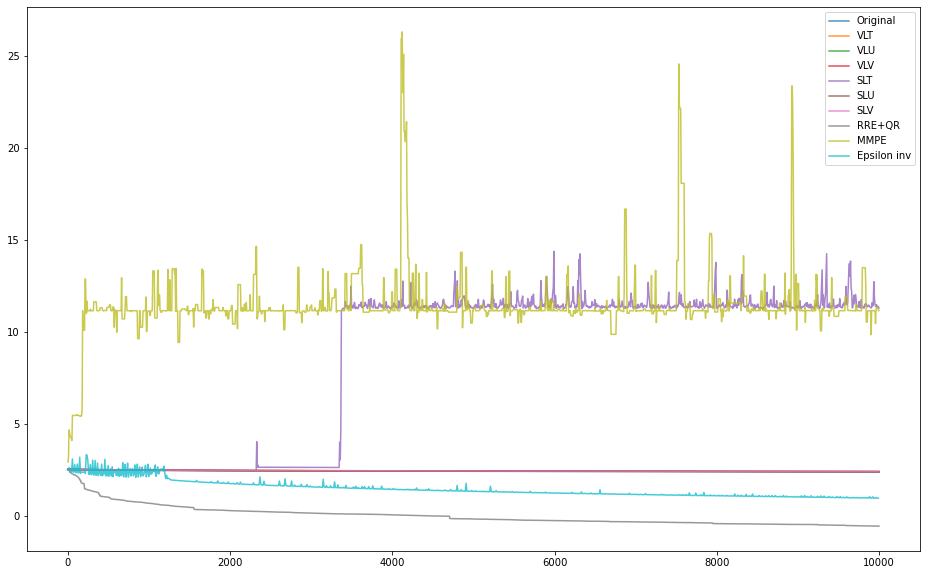

In [24]:
experiment.plot_log_diff(n=10000, figsize=(16, 10))